<a href="https://colab.research.google.com/github/JALVARADORUIZ/TFM_UB/blob/main/TFM_Limpieza_y_Procesado_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalación de librerías necesarias para limpieza de datos
!pip install --target=$nb_path dataprep
!pip install --target=$nb_path pycountry_convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 13.4 MB/s 
     |████████████████████████████████| 943 kB 66.1 MB/s 
     |████████████████████████████████| 965 kB 58.0 MB/s 
     |████████████████████████████████| 50 kB 3.9 MB/s 
     |████████████████████████████████| 133 kB 63.7 MB/s 
     |████████████████████████████████| 28.5 MB 1.7 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 65.7 MB/s 
     |████████████████████████████████| 101 kB 10.8 MB/s 
     |████████████████████████████████| 749 kB 71.8 MB/s 
     |████████████████████████████████| 96 kB 6.6 MB/s 
     |████████████████████████████████| 232 kB 88.5 MB/s 
     |████████████████████████████████| 1.6 MB 65.2 MB/s 
     |█████████████████████

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#### **IMPORTACIÓN DE LIBRERÍAS NECESARIAS**


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
from dataprep.eda import plot, plot_correlation, plot_missing

from dataprep.clean import clean_headers, clean_country, default_text_pipeline, clean_text

import pycountry_convert as pc

import matplotlib.pyplot as plt

%matplotlib inline

#### **LECTURA DE DATASET**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/TFM_Máster BDDS/datawine/wine_label_project_10k.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Winery        10000 non-null  object 
 1   Product       10000 non-null  object 
 2   Region        10000 non-null  object 
 3   Country code  10000 non-null  object 
 4   rating        10000 non-null  float64
 5   Variety       10000 non-null  object 
 6   Price USD     10000 non-null  float64
 7   image         10000 non-null  object 
dtypes: float64(2), object(6)
memory usage: 625.1+ KB


In [ ]:
df.head()

,Winery,Product,Region,Country code,rating,Variety,Price USD,image
0,Cathedral Ridge,Cathedral Ridge Bangsund Vineyard Pinot Noir 2006,Columbia Valley Oregon,us,3.5,Pinot Noir,163.000000,vintage-images/MBo5T9ZQQQGbzsRmVORp-w_pl_480x6...
1,Penfolds,Penfolds RWT Shiraz 2005,Barossa Valley,au,4.5,Shiraz/Syrah,169.950000,vintage-images/dDyTwzIfQC68MCUgjmYWpw_pl_480x6...
2,Marqués de Riscal,Marqués de Riscal Frank Gehry Selection 2001,Rioja,es,5.0,Tempranillo,357.196682,vintage-images/t44NPpbUT6uy0vRt4VD2RQ_pl_480x6...
3,Wyndham,Wyndham Pinot Noir BIN 333 2007,South Eastern Australia,au,4.0,Pinot Noir,10.990000,vintage-images/v1RahJe2QQyp4oAFOv90bA_pl_480x6...
4,Louis Jadot,Louis Jadot Chevalier Montrachet Grand Cru 2006,Chevalier-Montrachet Grand Cru,fr,5.0,Chardonnay,309.990000,vintage-images/VlMihlZUQE6US7fr09w5ZA_pl_480x6...


#### **LIMPIEZA DE DATASET**

In [ ]:
#Función que pasa nombre de columnas a lower y las une con "_"
df = clean_headers(df)

Column Headers Cleaning Report:
	6 values cleaned (75.0%)


In [ ]:
# Se utiliza para sacar el código del continente basado en el código del país.
df['pais'] = df['country_code'].str.upper()
df['continente'] = df['pais'].apply(lambda x: pc.country_alpha2_to_continent_code(x))
del df['pais']
df['continente'] = df['continente'].apply(lambda x: pc.convert_continent_code_to_continent_name(x).lower())

# Saca el nombre del país basado en el código del país.
df = clean_country(df, "country_code", input_format="alpha-2")

Country Cleaning Report:
	10000 values cleaned (100.0%)
Result contains 10000 (100.0%) values in the correct format and 0 null values (0.0%)


In [ ]:
#Función que transforma columnas a minúsculas, remueve acentos, puntuaciones y espacios en blanco.
custom_pipeline = [
    {"operator": "lowercase"},
    {"operator": "remove_accents"},
    {'operator': 'remove_punctuation'},
    {'operator': 'remove_whitespace'}
]

df = clean_text(df, "winery", pipeline=custom_pipeline)
df = clean_text(df, "product", pipeline=custom_pipeline)
df = clean_text(df, "region", pipeline=custom_pipeline)
df = clean_text(df, "variety", pipeline=custom_pipeline)
df = clean_text(df, "country_code_clean", pipeline=custom_pipeline)

In [ ]:
df.sample(10)

,winery,product,region,country_code,rating,variety,price_usd,image,continente,country_code_clean
3464,casteggio,casteggio barbera 2010,oltrepo pavese,it,4.0,barbera,14.99,vintage-images/Xx3sb6gkRMKhk2PL8IO7XA_pl_480x6...,europe,italy
7037,inglenook,inglenook st regis cabernet sauvignon,napa valley,us,2.5,cabernet sauvignon,7.99,vintage-images/1wFGJiJ6R62l5zOyKOQFTQ_pl_480x6...,north america,united states
5216,clos haut peyraguey,clos haut peyraguey sauternes premier grand cr...,sauternes,fr,4.5,semillon,56.00,vintage-images/72TsaRbkQR23RB_VPcNjpw_pl_480x6...,europe,france
9015,gut oggau,gut oggau timotheus weiss,weinland,at,4.0,gruner veltliner,123.99,vintage-images/5dz9o8YNRTy9fLpEcYg6TQ_pl_480x6...,europe,austria
4716,louis roederer,louis roederer cristal rose brut champagne mil...,champagne,fr,5.0,pinot noir,699.99,vintage-images/QcdE7SdeR3G1nzcAS4Scgg_pl_480x6...,europe,france
7286,domaine alain chavy,domaine alain chavy puligny montrachet 1er cru...,puligny montrachet 1er cru les folatieres,fr,4.0,chardonnay,70.00,vintage-images/m6vVPSzzS-6DCVcL-y6dwQ_pl_480x6...,europe,france
9134,hideaway creek,hideaway creek carneros chardonnay,napa valley,us,4.0,chardonnay,12.99,vintage-images/1345338133_2160.jpg,north america,united states
3386,st francis,st francis merlot,sonoma valley,us,4.0,merlot,17.99,vintage-images/VgmsJdRCRROr-NFH855Z4Q_pl_480x6...,north america,united states
7053,contadi castaldi,contadi castaldi franciacorta rose,franciacorta,it,4.0,chardonnay,22.99,vintage-images/Ci2aj5cZShqeGxWbCib4iA_pl_480x6...,europe,italy
5922,chehalem,chehalem ribbon ridge pinot noir 2010,ribbon ridge,us,4.0,pinot noir,64.50,vintage-images/3_GLRq00RDa6Wv3SH2oh_g_pl_480x6...,north america,united states


In [ ]:
df.continente.value_counts(dropna=False)

europe           6357
north america    2511
south america     623
oceania           393
africa             67
asia               49
Name: continente, dtype: int64

In [ ]:
df.country_code_clean.value_counts()

france           3026
united states    2503
italy            2088
spain             637
portugal          403
argentina         330
australia         330
chile             289
germany            82
south africa       67
new zealand        63
austria            49
greece             28
israel             27
hungary            14
lebanon            12
canada              7
slovenia            7
romania             6
georgia             6
macedonia           4
bulgaria            4
uruguay             4
moldova             4
switzerland         2
croatia             2
cyprus              2
turkey              1
palestine           1
mexico              1
montenegro          1
Name: country_code_clean, dtype: int64

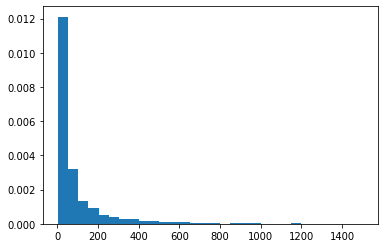

In [ ]:
pd.set_option('display.max_colwidth', None)
plt.hist(df.query('price_usd < 1500').price_usd, density=True, bins=30);

In [ ]:
'{}%'.format(round((1-(df.query('price_usd < 1500').shape[0]/df.shape[0]))*100,2))


'1.05%'

In [ ]:
df = df.query('price_usd < 1500')

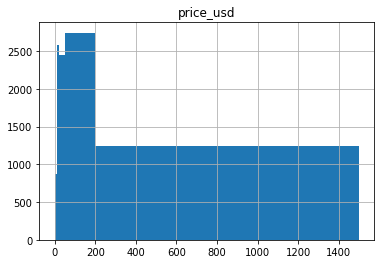

In [ ]:
df.hist(column = 'price_usd', bins=[0,10,20,50,200,1500])
plt.show()

In [ ]:
df['price_cat'] = pd.cut(df['price_usd'], bins=[0,15,50,150,1500], labels=['bajo', 'medio bajo', 'medio alto', 'alto'])

In [ ]:
df.price_cat.value_counts().to_frame()

,price_cat
medio bajo,3568
bajo,2357
medio alto,2297
alto,1673


In [ ]:
df['rating_cat'] = pd.cut(df['rating'], bins=[0,2.5,3.5,4,5], labels = ['malo', 'bueno', 'muy bueno','excelente'])

In [ ]:
df.rating_cat.value_counts()/len(df)*100

excelente    37.321880
muy bueno    35.816069
bueno        21.253158
malo          5.608893
Name: rating_cat, dtype: float64

**The three official tiers of French wine quality classification:**
- AOC:
    - Grand Cru
    - Premier Cru
- Vin de Pays
- Vin de France: The most basic quality tier for French wine. 

**French Wine Label Terms**
- Blanc: White
- Brut: Dry
- Cave: Wine cellar
- Château: Estate - literally 'castle', but mostly refers to large country houses
- Coopérative: A co-operative or, more likely, a syndicate of wine growers
- Côte/Coteaux: Slope of a hill/hillsides
- Crémant: A style of sparkling wine other than Champagne
- Cru: Literally, 'growth' - denotes status of a winery or vineyard
- Cru Classé: Classified vineyard
- Demi-sec: Medium-dry
- Domaine: Estate
- Doux: Sweet
- Grand cru: Literally, 'great growth' - highest-quality wines
- Méthode Traditionnelle: Traditional method of sparkling winemaking, same as used for Champagne
- Millésime: Vintage
Mis en bouteille au château / domaine: Bottled at the chateau/domaine
- Négociant: A merchant who buys grapes, juice or wine from growers and sells the wines under his own label
- Premier Cru: First growth
- Propriétaire: Estate or vineyard owner
- Récoltant: A grape grower - literally 'harvester'
- Rouge: Red
- Sélection de Grains Nobles: Sweet wine made from grapes afftected by botrytis
- Supérieur: Wine with higher (superior) alcohol content as a result of being made from riper grapes

In [ ]:
df['quality'] = None

In [ ]:
df.loc[df['product'].str.contains("reserv") & df['quality']=="", 'quality'] = "reserve"

In [ ]:
df.loc[df['region'].str.contains("vin de pays"), 'quality'] = "vin de pays"
df.loc[df['region'].str.contains("vin de france"), 'quality'] = "vin de france"
df.loc[df['region'].str.contains("grand cru"), 'quality'] = "grand cru"
df.loc[df['region'].str.contains("premier cru"), 'quality'] = "premier cru"

In [ ]:
df.loc[df['product'].str.contains("vin de pays"), 'quality'] = "vin de pays"
df.loc[df['product'].str.contains("vin de france"), 'quality'] = "vin de france"
df.loc[df['product'].str.contains("grand cru"), 'quality'] = "grand cru"
df.loc[df['product'].str.contains("premier cru"), 'quality'] = "premier cru"

In [ ]:
df.loc[df['quality'].isna(), 'quality'] = "undefined"

In [ ]:
df.quality.value_counts(dropna=False)

undefined        8955
grand cru         824
premier cru        84
vin de france      25
vin de pays         7
Name: quality, dtype: int64

In [ ]:
df[df['region'].str.contains("emilion")].region.value_counts()

saint emilion grand cru        204
montagne saint emilion           8
saint emilion                    3
saint georges saint emilion      2
puisseguin saint emilion         1
lussac saint emilion             1
Name: region, dtype: int64

In [ ]:
df['color'] = None

In [ ]:
metodo1 = (df['product'].str.contains("blanc")) | \
          (df['product'].str.contains("white"))
df.loc[metodo1, 'color'] = "white"

metodo2 = (df['product'].str.contains("red ")) | \
          (df['product'].str.contains(" red")) | \
          (df['product'].str.contains("rouge"))
df.loc[metodo2, 'color'] = "red"

metodo3 = (df['product'].str.contains("rose ")) | \
          (df['product'].str.contains(" rose"))
df.loc[metodo3, 'color'] = "rose"

metodo4 = (df['variety'].str.contains("blanc")) | \
          (df['variety'].str.contains("white"))
df.loc[metodo4, 'color'] = "white"

metodo5 = (df['variety'].str.contains("red ")) | \
          (df['variety'].str.contains(" red")) | \
          (df['variety'].str.contains("rouge")) | \
          (df['variety'].str.contains("tinto")) | \
          (df['variety'].str.contains("tinta"))
df.loc[metodo5, 'color'] = "red"

metodo6 = (df['color'].isna()) & (df['variety'] == 'pinot gris') | \
          (df['color'].isna()) & (df['variety'] == 'moscato') | \
          (df['color'].isna()) & (df['variety'] == 'pinot grigio') | \
          (df['color'].isna()) & (df['variety'] == 'grillo') | \
          (df['color'].isna()) & (df['variety'] == 'glera') | \
          (df['color'].isna()) & (df['variety'] == 'glera prosecco') | \
          (df['color'].isna()) & (df['variety'] == 'chenin blanc') | \
          (df['color'].isna()) & (df['variety'] == 'semillon') | \
          (df['color'].isna()) & (df['variety'] == 'chardonnay') | \
          (df['color'].isna()) & (df['variety'] == 'riesling') | \
          (df['color'].isna()) & (df['variety'] == 'torrontes') | \
          (df['color'].isna()) & (df['variety'] == 'macabeo') | \
          (df['color'].isna()) & (df['variety'] == 'palomino') | \
          (df['color'].isna()) & (df['variety'] == 'albarino') | \
          (df['color'].isna()) & (df['variety'] == 'viognier') | \
          (df['color'].isna()) & (df['variety'] == 'cortese') | \
          (df['color'].isna()) & (df['variety'] == 'malvasia') | \
          (df['color'].isna()) & (df['variety'] == 'verdicchio') | \
          (df['color'].isna()) & (df['variety'] == 'vermentino') | \
          (df['color'].isna()) & (df['variety'] == 'garganega') | \
          (df['color'].isna()) & (df['variety'] == 'trebbiano') | \
          (df['color'].isna()) & (df['variety'] == 'pedro ximenez') | \
          (df['color'].isna()) & (df['variety'] == 'muscat blanc') | \
          (df['color'].isna()) & (df['variety'] == 'gruner veltliner') | \
          (df['color'].isna()) & (df['variety'] == 'gewurztraminer') | \
          (df['color'].isna()) & (df['variety'] == 'moscato bianco') | \
          (df['color'].isna()) & (df['variety'] == 'arinto de bucelas ') | \
          (df['color'].isna()) & (df['variety'] == 'sauvignon blanc')
df.loc[metodo6, 'color'] = "white"

metodo7 = (df['color'].isna()) & (df['variety'] == "cabernet franc") | \
          (df['color'].isna()) & (df['variety'] == 'cabernet sauvignon') | \
          (df['color'].isna()) & (df['variety'] == 'carmenere') | \
          (df['color'].isna()) & (df['variety'] == 'shiraz syrah') | \
          (df['color'].isna()) & (df['variety'] == 'petite sirah') | \
          (df['color'].isna()) & (df['variety'] == 'pinot noir') | \
          (df['color'].isna()) & (df['variety'] == 'merlot') | \
          (df['color'].isna()) & (df['variety'] == 'sangiovese') | \
          (df['color'].isna()) & (df['variety'] == 'nebbiolo') | \
          (df['color'].isna()) & (df['variety'] == 'tempranillo') | \
          (df['color'].isna()) & (df['variety'] == 'touriga nacional') | \
          (df['color'].isna()) & (df['variety'] == 'touriga franca') | \
          (df['color'].isna()) & (df['variety'] == 'malbec') | \
          (df['color'].isna()) & (df['variety'] == 'mourvedre') | \
          (df['color'].isna()) & (df['variety'] == 'grenache') | \
          (df['color'].isna()) & (df['variety'] == 'garnacha') | \
          (df['color'].isna()) & (df['variety'] == 'corvina') | \
          (df['color'].isna()) & (df['variety'] == 'barbera') | \
          (df['color'].isna()) & (df['variety'] == 'gamay') | \
          (df['color'].isna()) & (df['variety'] == 'negroamaro') | \
          (df['color'].isna()) & (df['variety'] == 'aglianico') | \
          (df['color'].isna()) & (df['variety'] == 'primitivo') | \
          (df['color'].isna()) & (df['variety'] == 'lambrusco') | \
          (df['color'].isna()) & (df['variety'] == 'montepulciano') | \
          (df['color'].isna()) & (df['variety'] == 'monastrell') | \
          (df['color'].isna()) & (df['variety'] == 'dolcetto') | \
          (df['color'].isna()) & (df['variety'] == 'concord') | \
          (df['color'].isna()) & (df['variety'] == 'sagrantino') | \
          (df['color'].isna()) & (df['variety'] == 'brachetto') | \
          (df['color'].isna()) & (df['variety'] == 'carignan') | \
          (df['color'].isna()) & (df['variety'] == 'petit verdot') | \
          (df['color'].isna()) & (df['variety'] == 'pinot meunier') | \
          (df['color'].isna()) & (df['variety'] == 'rondinella') | \
          (df['color'].isna()) & (df['variety'] == 'pinot nero') | \
          (df['color'].isna()) & (df['variety'] == 'nero d avola') | \
          (df['color'].isna()) & (df['variety'] == 'zinfandel')
df.loc[metodo7, 'color'] = "red"



In [ ]:
metodo8 = (df['color'].isna())
df.loc[metodo8, 'color'] = "undefined"

#metodo9 = (df['color']=="rose")
#df.loc[metodo9, 'color'] = "other"

In [ ]:
df[df['color'].isna()].variety.value_counts()

Series([], Name: variety, dtype: int64)

In [ ]:
df.color.value_counts(dropna=False).sum()

9895

In [ ]:
create_report(df)

In [ ]:
df['image_clean'] = df['image'].str.split('/', n=1).str.get(-1)

In [ ]:
df.head(5)

,winery,product,region,country_code,rating,variety,price_usd,image,continente,country_code_clean,price_cat,rating_cat,quality,color,image_clean
0,cathedral ridge,cathedral ridge bangsund vineyard pinot noir 2006,columbia valley oregon,us,3.5,pinot noir,163.000000,vintage-images/MBo5T9ZQQQGbzsRmVORp-w_pl_480x640.png,north america,united states,alto,bueno,undefined,red,MBo5T9ZQQQGbzsRmVORp-w_pl_480x640.png
1,penfolds,penfolds rwt shiraz 2005,barossa valley,au,4.5,shiraz syrah,169.950000,vintage-images/dDyTwzIfQC68MCUgjmYWpw_pl_480x640.png,oceania,australia,alto,excelente,undefined,red,dDyTwzIfQC68MCUgjmYWpw_pl_480x640.png
2,marques de riscal,marques de riscal frank gehry selection 2001,rioja,es,5.0,tempranillo,357.196682,vintage-images/t44NPpbUT6uy0vRt4VD2RQ_pl_480x640.png,europe,spain,alto,excelente,undefined,red,t44NPpbUT6uy0vRt4VD2RQ_pl_480x640.png
3,wyndham,wyndham pinot noir bin 333 2007,south eastern australia,au,4.0,pinot noir,10.990000,vintage-images/v1RahJe2QQyp4oAFOv90bA_pl_480x640.png,oceania,australia,bajo,muy bueno,undefined,red,v1RahJe2QQyp4oAFOv90bA_pl_480x640.png
4,louis jadot,louis jadot chevalier montrachet grand cru 2006,chevalier montrachet grand cru,fr,5.0,chardonnay,309.990000,vintage-images/VlMihlZUQE6US7fr09w5ZA_pl_480x640.png,europe,france,alto,excelente,grand cru,white,VlMihlZUQE6US7fr09w5ZA_pl_480x640.png


In [ ]:
# Guardé archivo limpio para trabajar en otro notebook el modelo y así evitar tener que instalar librerías del principio

df.to_csv('/content/drive/MyDrive/TFM_Máster BDDS/datawine/df_clean2.csv', index=False)